In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [8]:
data_train_path = r'E:\project image classification\Fruits_Vegetables\Fruits_Vegetables\train'
data_test_path = r'E:\project image classification\Fruits_Vegetables\Fruits_Vegetables\test'
data_val_path = r'E:\project image classification\Fruits_Vegetables\Fruits_Vegetables\validation'

In [9]:
img_width = 180
img_height =180 

In [10]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [12]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [14]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


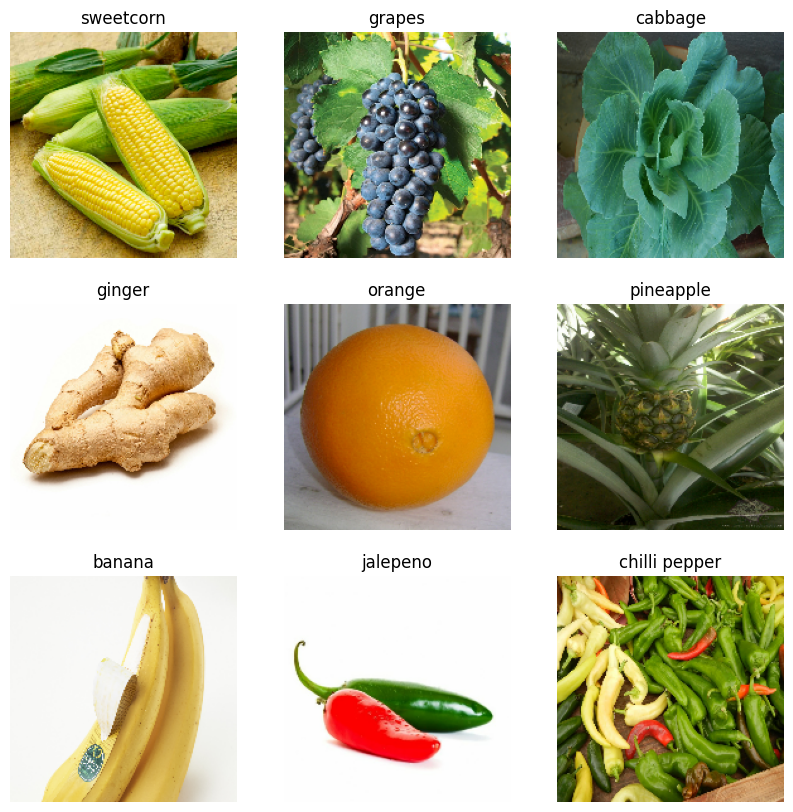

In [21]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 765ms/step - accuracy: 0.0485 - loss: 3.6688 - val_accuracy: 0.2650 - val_loss: 2.5355
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 690ms/step - accuracy: 0.2409 - loss: 2.6792 - val_accuracy: 0.5783 - val_loss: 1.5780
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 790ms/step - accuracy: 0.4195 - loss: 2.0064 - val_accuracy: 0.7635 - val_loss: 0.9024
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 726ms/step - accuracy: 0.6091 - loss: 1.4046 - val_accuracy: 0.8462 - val_loss: 0.6091
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 731ms/step - accuracy: 0.7684 - loss: 0.8137 - val_accuracy: 0.9003 - val_loss: 0.4939
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 731ms/step - accuracy: 0.8500 - loss: 0.5268 - val_accuracy: 0.9288 - val_loss: 0.5219
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 712ms/step - accuracy: 0.9159 - loss: 0.3401 - val_accuracy: 0.9430 - val_loss: 0.4612
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 688ms/step - accuracy: 0.9391 - loss: 0.2624 - val_accu

Text(0.5, 1.0, 'Loss')

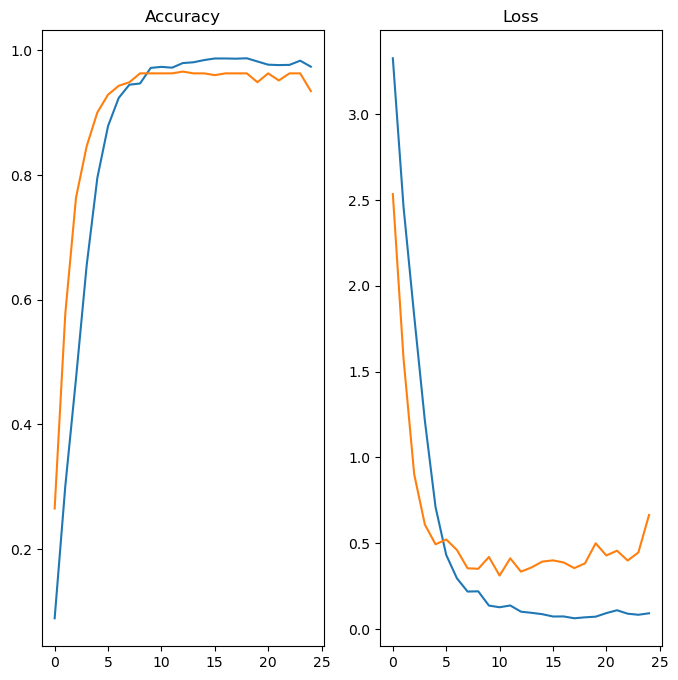

In [20]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [21]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [22]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


In [23]:
score = tf.nn.softmax(predict)

In [24]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 92.83


In [26]:
model.save('Image_classify.keras')